# CIFAR 10 image classification

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

from keras.datasets import cifar10

In [4]:
batch_size = 32
n_classes = 10
epochs = 100

weight_decay = 1e-4
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
n_images = 5

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape', x_train.shape)
print(x_train.shape[0], ' train samples.')
print(x_test.shape[0], ' test samples.')

x_train shape (50000, 32, 32, 3)
50000  train samples.
10000  test samples.


In [6]:
def show_images(images):
    plt.figure(1)
    image_index = 0
    for i in range(0, n_images):
        for j in range(0, n_images):
            plt.subplot2grid((n_images, n_images), (i, j))
            plt.imshow(Image.fromarray(images[image_index]))
            image_index += 1
            plt.gca().axes.get_yaxis().set_visible(False)
            plt.gca().axes.get_xaxis().set_visible(False)
    plt.show()

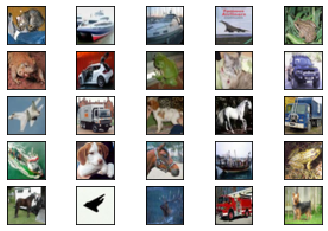

In [8]:
show_images(x_test[:n_images*n_images])

## Preprocessing data

In [9]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [15]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), input_shape = x_train.shape[1:]))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_classes, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

In [18]:
opt = tf.keras.optimizers.RMSprop(lr = 0.0001, decay = 0.99)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Real time data augmentation

\latex
is done using \it{tf.keras.preprocessing.image.ImageDataGenerator}

In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True, validation_split = 0.1)

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', min_delta = 0, patience = 1, verbose = 1, mode = 'max', restore_best_weights = True)

In [23]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, callbacks = [callback])

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

mdoel_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('model saved at : %s'%model_path)

W0706 12:50:34.898344 15324 deprecation.py:323] From <ipython-input-23-3dfcdb3174ba>:1: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.
W0706 12:50:34.948162 15324 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 1563 steps
Epoch 1/100
1563/1563 [==============================] - 328s 210ms/step - loss: 3.4363 - accuracy: 0.1494
Epoch 2/100
1219/1563 [======================>.......] - ETA: 1:03 - loss: 3.4109 - accuracy: 0.1497

KeyboardInterrupt: 

### If we want to reload our model

In [ ]:
model1 = tf.keras.models.load_model(model_path)
model1.summary()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_images(x_test[:n_images*n_images])
x_test = x_test.astype('float32')/255.

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
ids = tf.argmax(input = model1.predict(x_test[:n_images*n_images]), axis=1)

i = 0

print('Learned \t True')
print('==================')
for idx in ids:
    print(labels[index], '\t', labels[y_test[i][0]])
    i += 1